<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


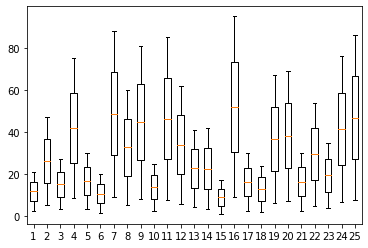

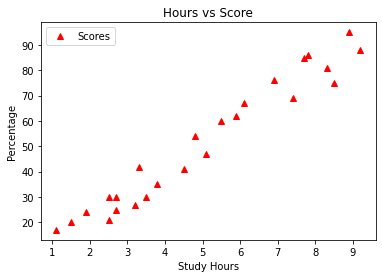

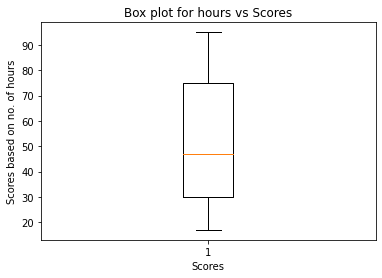

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000
[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]
Training complete
B0 = 2.018160041434662 
B1 = [9.91065648]


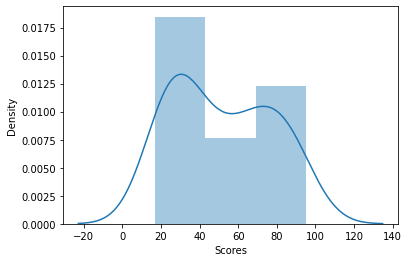

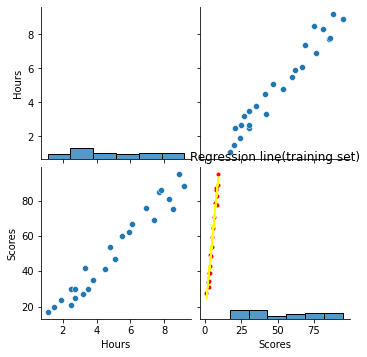

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


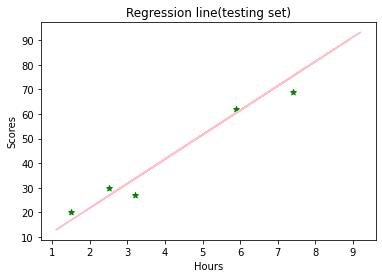

MSE =  21.598769307217456
RMSE =  4.647447612100373
Predicted score of a student studying 9.25 hours per day is:  [93.69173249]


In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

"""#### Reading Data"""

data=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

data

"""#### Analysis of DATA"""

data.info()

data.describe()

data.isnull().sum()

plt.boxplot(data)     ##Data Visualisation
plt.show()

data.plot(x='Hours', y='Scores', style='^', color='red')
plt.title('Hours vs Score')
plt.xlabel('Study Hours')
plt.ylabel('Percentage')
plt.show()

data_scores = data['Scores']
plt.boxplot(data_scores)
plt.title('Box plot for hours vs Scores')
plt.xlabel('Scores')
plt.ylabel('Scores based on no. of hours')
plt.show()

sns.distplot(data['Scores'])

correlation = data.corr(method= 'pearson')
print(correlation)

sns.pairplot(data)



"""# **SIMPLE LINEAR REGRESSION** """

X = data.iloc[:,:-1].values
Y = data.iloc[:,1].values
print(X)

print(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.80, test_size= 0.20, random_state = 0)

regressor = LinearRegression()
regressor.fit(X_train, Y_train)
print("Training complete")

print("B0 =",regressor.intercept_, "\nB1 =", regressor.coef_)

reg_line = regressor.intercept_ + regressor.coef_*X_train

plt.scatter(X_train, Y_train, color =  'red', marker='.' )
plt.plot(X_train,reg_line,color='yellow')
plt.title("Regression line(training set)")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

import statsmodels.api as sm
x_train_sm = sm.add_constant(X_train)   ##Build linear model
model = sm.OLS(Y_train, x_train_sm).fit()
model.summary()

y_pred = regressor.predict(X_test)
print(y_pred)

df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df

plt.scatter(X_test, Y_test, color =  'green', marker='*' )
plt.plot(X_train,reg_line,color='pink')
plt.title("Regression line(testing set)")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

metrics.r2_score(Y_test, y_pred)

MSE = metrics.mean_squared_error(Y_test, y_pred)
RMSE = np.sqrt(MSE)
print("MSE = ", MSE)
print("RMSE = ", RMSE)

Predicted_score = regressor.predict([[9.25]])
print("Predicted score of a student studying 9.25 hours per day is: ", Predicted_score)



"""#**RESULT:-** 
# 1) THE DATA HAVE 2 ATTRIBUTES "Hours" and "Scores
# 2) I HAVE USED "Linear Rgression" BECAUSE "Hours" and "Scores" ARE LINEARLY DEPENDENT
### 3) USING LINEAR REGRESSION I HAVE ACHIEVED 95% Accuracy on the TRAIN SET and 94.54% Accuracy on the TRAIN DATA
### 4) WE CAN CONCLUDE THAT OUR MODEL IS NOT OVERFITTING
### **5) IF A STUDENT STUDIES FOR 9.25 HOURS A DAY THE PREDICTED SCORE WILL BE 93.69** 